# Equalizing Difference Model

## Overview

This lecture presents a model of the college-high-school wage gap in which the
"time to build" a college graduate plays a key role.


Milton Friedman invented the   model  to study whether  differences in  earnings of US dentists and doctors were outcomes of  competitive labor markets or whether
they reflected entry barriers imposed by governments working in conjunction with doctors' professional organizations. 

Chapter 4 of Jennifer Burns {cite}`Burns_2023` describes  Milton Friedman's joint work with Simon Kuznets that eventually  led to the publication of {cite}`kuznets1939incomes` and {cite}`friedman1954incomes`.

To map  Friedman's application into our model, think of our high school students as Friedman's dentists and our college graduates as Friedman's doctors.  


Our presentation is "incomplete" in the sense that it is based on  a single equation that would be part of set equilibrium conditions of a more fully articulated model.

This ''equalizing difference'' equation  determines  a college-high-school wage ratio that equalizes present values of a high school educated  worker and a college educated worker.

The idea  is that lifetime earnings somehow adjust to make a new high school worker indifferent between going to college and not going to college but instead going to work immediately.

(The job of the "other equations" in a more complete model would be to describe what adjusts to bring about this outcome.)

Our model is just one example  of an  "equalizing difference" theory of relative wage rates, a class of theories dating back at least to Adam Smith's **Wealth of Nations** {cite}`smith2010wealth`.  

For most of this lecture, the only mathematical tools that we'll use are from linear algebra, in particular, matrix multiplication and matrix inversion.

However, near the  end of the lecture, we'll use calculus just in case readers want to see how computing partial derivatives could let us present some findings more concisely.  

And doing that will let illustrate how good Python is at doing calculus!

But if you don't know calculus, our tools from linear algebra are certainly enough.

As usual, we'll start by importing some Python modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from sympy import Symbol, Lambda, symbols

## The indifference condition

The key idea is that the entry level college wage premium has to adjust to make a representative worker indifferent between going to college and not going to college.

Let

 * $R > 1$ be the gross rate of return on a one-period bond

 * $t = 0, 1, 2, \ldots T$ denote the years that a person either works or attends college
 
 * $0$ denote the first period after high school that a person can work if he does not go to college
 
 * $T$ denote the last period  that a person  works
 
 * $w_t^h$ be the wage at time $t$ of a high school graduate
 
 * $w_t^c$ be the wage at time $t$ of a college graduate
 
 * $\gamma_h > 1$ be the (gross) rate of growth of wages of a  high school graduate, so that
 $ w_t^h = w_0^h \gamma_h^t$
 
 * $\gamma_c > 1$ be the (gross) rate of growth of wages of a  college  graduate, so that
 $ w_t^c = w_0^c \gamma_c^t$

 * $D$ be the upfront monetary costs of going to college

We now compute present values that a new high school graduate earns if

  * he goes to work immediately and earns wages paid to someone without a college education
  * he goes to college for four years and after graduating earns wages paid to a college graduate

### Present value of a high school educated worker

If someone goes to work immediately after high school  and  works for the  $T+1$ years $t=0, 1, 2, \ldots, T$, she earns present value

$$
h_0 = \sum_{t=0}^T R^{-t} w_t^h = w_0^h \left[ \frac{1 - (R^{-1} \gamma_h)^{T+1} }{1 - R^{-1} \gamma_h } \right] \equiv w_0^h A_h 
$$

where 

$$
A_h = \left[ \frac{1 - (R^{-1} \gamma_h)^{T+1} }{1 - R^{-1} \gamma_h } \right].
$$

The present value $h_0$ is the "human wealth" at the beginning of time $0$ of someone who chooses not to attend college but instead to go to work immediately at the wage of a high school graduate.

### Present value of a college-bound new high school graduate


If someone goes to college for the four years $t=0, 1, 2, 3$ during which she earns $0$, but then goes to work  immediately after college   and  works for the $T-3$ years $t=4, 5, \ldots ,T$, she earns present value

$$
c_0 = \sum_{t=4}^T R^{-t} w_t^c = w_0^c (R^{-1} \gamma_c)^4  \left[ \frac{1 - (R^{-1} \gamma_c)^{T-3} }{1 - R^{-1} \gamma_c } \right] \equiv w_0^c A_c
$$

where

$$
A_c = (R^{-1} \gamma_c)^4  \left[ \frac{1 - (R^{-1} \gamma_c)^{T-3} }{1 - R^{-1} \gamma_c } \right] .
$$ 

The present value $c_0$  is the "human wealth" at the beginning of time $0$ of someone who chooses to attend college for four years and then start to work at time $t=4$ at the wage of a college graduate.


Assume that college tuition plus four years of room and board amount to  $D$ and must be paid at time $0$.

So net of monetary cost of college, the present value of attending college as of the first period after high school is

$$ 
c_0 - D
$$

We now formulate a pure **equalizing difference** model of the initial college-high school wage gap $\phi$ that verifies 

$$
w_0^c = \phi w_0^h 
$$

We suppose that $R, \gamma_h, \gamma_c, T$ and also $w_0^h$  are fixed parameters. 

We start by noting that the pure equalizing difference model asserts that the college-high-school wage gap $\phi$ solves an 
"equalizing" equation that sets the present value not going to college equal to the present value of going to college:


$$
h_0 = c_0 - D
$$ 

or

$$ 
w_0^h A_h  = \phi w_0^h A_c - D .
$$ (eq:equalize)

This "indifference condition"  is the heart of the model.

Solving equation {eq}`eq:equalize` for the college wage premium $\phi$ we obtain

$$
\phi  = \frac{A_h}{A_c} + \frac{D}{w_0^h A_c} .
$$ (eq:wagepremium)

In a **free college** special case $D =0$.

Here  the only cost of going to college is the forgone earnings from being  a high school educated worker.  

In that case,

$$
\phi  = \frac{A_h}{A_c} . 
$$

In the next section we'll write Python code to compute $\phi$  and plot it as a function of its determinants.

## Computations


We can have some fun with examples that tweak various parameters,
prominently including $\gamma_h, \gamma_c, R$.

Now let's write some Python code to compute $\phi$ and plot it as a function of some of its determinants.

In [2]:
# Define the namedtuple for the equalizing difference model
EqDiffModel = namedtuple('EqDiffModel', 'R T γ_h γ_c w_h0 D')

def create_edm(R=1.05,   # gross rate of return
               T=40,     # time horizon
               γ_h=1.01, # high-school wage growth
               γ_c=1.01, # college wage growth
               w_h0=1,   # initial wage (high school)
               D=10,     # cost for college
              ):
    
    return EqDiffModel(R, T, γ_h, γ_c, w_h0, D)

def compute_gap(model):
    R, T, γ_h, γ_c, w_h0, D = model
    
    A_h = (1 - (γ_h/R)**(T+1)) / (1 - γ_h/R)
    A_c = (1 - (γ_c/R)**(T-3)) / (1 - γ_c/R) * (γ_c/R)**4
    ϕ = A_h / A_c + D / (w_h0 * A_c)
    
    return ϕ

Using vectorization instead of loops,
we  build some functions to help do comparative statics .

For a given instance of the class, we want to recompute $\phi$ when one parameter changes and others remain fixed.

Let's do an example.

In [3]:
ex1 = create_edm()
gap1 = compute_gap(ex1)

gap1

1.8041412724969135

Let's not charge for college and recompute $\phi$.

The initial college wage premium should go down.

In [4]:
# free college
ex2 = create_edm(D=0)
gap2 = compute_gap(ex2)
gap2

1.2204649517903732

Let us construct some graphs that show us how the initial college-high-school wage ratio $\phi$ would change if one of its determinants were to change. 

Let's start with the gross interest rate $R$.

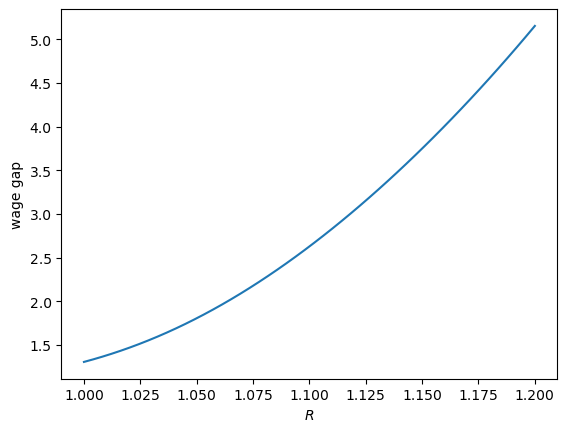

In [5]:
R_arr = np.linspace(1, 1.2, 50)
models = [create_edm(R=r) for r in R_arr]
gaps = [compute_gap(model) for model in models]

plt.plot(R_arr, gaps)
plt.xlabel(r'$R$')
plt.ylabel(r'wage gap')
plt.show()

Evidently, the initial wage ratio $\phi$ must rise to compensate a prospective high school student for **waiting** to start receiving income -- remember that while she is earning nothing in years $t=0, 1, 2, 3$, the high school worker is earning a salary.

Not let's study what happens to the initial wage ratio $\phi$ if the rate of growth of college wages rises, holding constant other 
determinants of $\phi$.

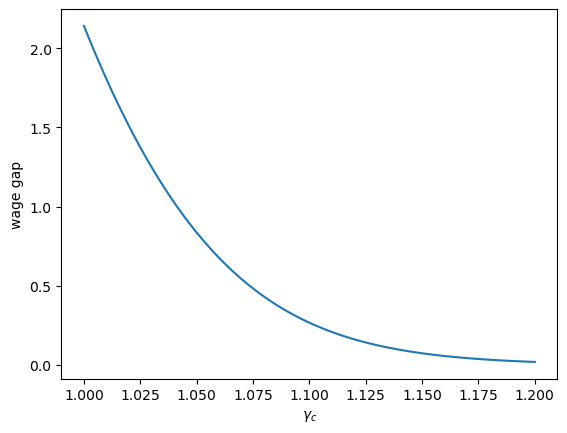

In [6]:
γc_arr = np.linspace(1, 1.2, 50)
models = [create_edm(γ_c=γ_c) for γ_c in γc_arr]
gaps = [compute_gap(model) for model in models]

plt.plot(γc_arr, gaps)
plt.xlabel(r'$\gamma_c$')
plt.ylabel(r'wage gap')
plt.show()

Notice how  the initial wage gap falls when the rate of growth $\gamma_c$ of college wages rises.  

The wage gap falls to "equalize" the present values of the two types of career, one as a high school worker, the other as a college worker.

Can you guess what happens to the initial wage ratio $\phi$ when next we vary the rate of growth of high school wages, holding all other determinants of $\phi$ constant?  

The following graph shows what happens.

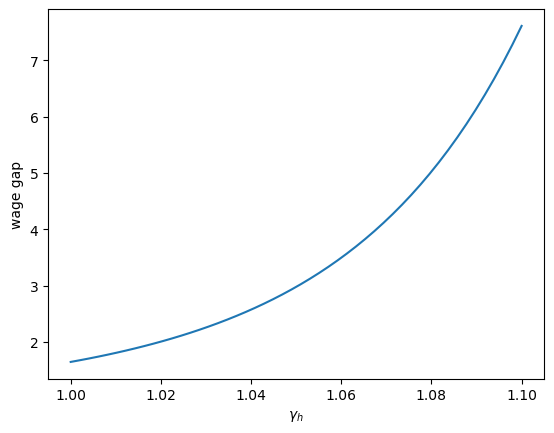

In [7]:
γh_arr = np.linspace(1, 1.1, 50)
models = [create_edm(γ_h=γ_h) for γ_h in γh_arr]
gaps = [compute_gap(model) for model in models]

plt.plot(γh_arr, gaps)
plt.xlabel(r'$\gamma_h$')
plt.ylabel(r'wage gap')
plt.show()

## Entrepreneur-worker interpretation

We can add a parameter and reinterpret variables to get a model of entrepreneurs versus workers.

We now let $h$ be  the present value of a "worker".

We define the present value of an entrepreneur to be

$$
c_0 = \pi \sum_{t=4}^T R^{-t} w_t^c
$$

where $\pi \in (0,1) $ is  the probability that an entrepreneur's "project" succeeds.

For our model of workers and firms, we'll interpret $D$ as the cost of becoming an entrepreneur.  

This cost might include costs of hiring workers, office space, and lawyers. 

What we used to call the college, high school wage gap $\phi$ now becomes the ratio
of a successful entrepreneur's earnings to a worker's earnings.  

We'll find that as $\pi$ decreases, $\phi$ increases, indicating that the riskier it is to
be an entrepreneur, the higher must be the reward for a successful project. 

Now let's adopt the entrepreneur-worker interpretation of our model

In [8]:
# Define a model of entrepreneur-worker interpretation
EqDiffModel = namedtuple('EqDiffModel', 'R T γ_h γ_c w_h0 D π')

def create_edm_π(R=1.05,   # gross rate of return
                 T=40,     # time horizon
                 γ_h=1.01, # high-school wage growth
                 γ_c=1.01, # college wage growth
                 w_h0=1,   # initial wage (high school)
                 D=10,     # cost for college
                 π=0       # chance of business success
              ):
    
    return EqDiffModel(R, T, γ_h, γ_c, w_h0, D, π)


def compute_gap(model):
    R, T, γ_h, γ_c, w_h0, D, π = model
    
    A_h = (1 - (γ_h/R)**(T+1)) / (1 - γ_h/R)
    A_c = (1 - (γ_c/R)**(T-3)) / (1 - γ_c/R) * (γ_c/R)**4
    
    # Incorprate chance of success
    A_c = π * A_c
    
    ϕ = A_h / A_c + D / (w_h0 * A_c)
    return ϕ

If the probability that a new business succeeds is $0.2$, let's compute the initial wage premium for successful entrepreneurs.

In [9]:
ex3 = create_edm_π(π=0.2)
gap3 = compute_gap(ex3)

gap3

9.020706362484567

Now let's study how the initial wage premium for successful entrepreneurs depend on the success probability.

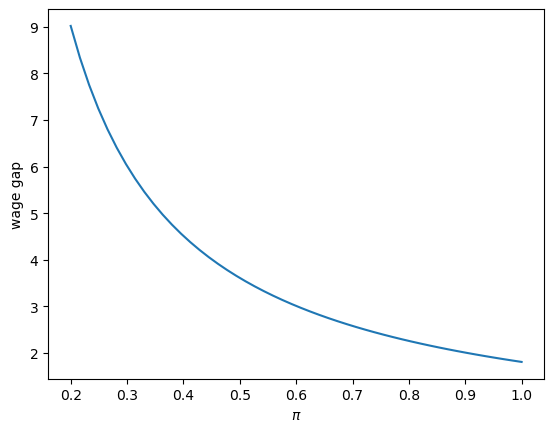

In [10]:
π_arr = np.linspace(0.2, 1, 50)
models = [create_edm_π(π=π) for π in π_arr]
gaps = [compute_gap(model) for model in models]

plt.plot(π_arr, gaps)
plt.ylabel(r'wage gap')
plt.xlabel(r'$\pi$')
plt.show()

Does the graph make sense to you?



## An application of calculus

So far, we have used only linear algebra and it has been a good enough tool for us to  figure out how our model works.

However, someone who knows calculus might want us  just to  take partial derivatives.

We'll do that now.

A reader who doesn't know calculus could read no further and feel confident that applying linear algebra has taught us the main properties of the model.

But for a reader interested in how we can get Python to do all the hard work involved in computing partial derivatives, we'll say a few things about that now.  

We'll use the Python module 'sympy' to compute partial derivatives of $\phi$ with respect to the parameters that determine it.

Define symbols

In [11]:
γ_h, γ_c, w_h0, D = symbols('\gamma_h, \gamma_c, w_0^h, D', real=True)
R, T = Symbol('R', real=True), Symbol('T', integer=True)

Define function $A_h$

In [12]:
A_h = Lambda((γ_h, R, T), (1 - (γ_h/R)**(T+1)) / (1 - γ_h/R))
A_h

Lambda((\gamma_h, R, T), (1 - (\gamma_h/R)**(T + 1))/(1 - \gamma_h/R))

Define function $A_c$

In [13]:
A_c = Lambda((γ_c, R, T), (1 - (γ_c/R)**(T-3)) / (1 - γ_c/R) * (γ_c/R)**4)
A_c

Lambda((\gamma_c, R, T), \gamma_c**4*(1 - (\gamma_c/R)**(T - 3))/(R**4*(1 - \gamma_c/R)))

Now, define $\phi$

In [14]:
ϕ = Lambda((D, γ_h, γ_c, R, T, w_h0), A_h(γ_h, R, T)/A_c(γ_c, R, T) + D/(w_h0*A_c(γ_c, R, T)))

In [15]:
ϕ

Lambda((D, \gamma_h, \gamma_c, R, T, w_0^h), D*R**4*(1 - \gamma_c/R)/(\gamma_c**4*w_0^h*(1 - (\gamma_c/R)**(T - 3))) + R**4*(1 - \gamma_c/R)*(1 - (\gamma_h/R)**(T + 1))/(\gamma_c**4*(1 - (\gamma_c/R)**(T - 3))*(1 - \gamma_h/R)))

We begin by setting  default parameter values.

In [16]:
R_value = 1.05
T_value = 40
γ_h_value, γ_c_value = 1.01, 1.01
w_h0_value = 1
D_value = 10

Now let's compute $\frac{\partial \phi}{\partial D}$ and then evaluate it at the default values

In [17]:
ϕ_D = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(D)
ϕ_D

R**4*(1 - \gamma_c/R)/(\gamma_c**4*w_0^h*(1 - (\gamma_c/R)**(T - 3)))

In [18]:
# Numerical value at default parameters
ϕ_D_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_D)
ϕ_D_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

0.0583676320706540

Thus, as with our earlier graph, we find that raising $R$ increases the initial college wage premium $\phi$.

Compute $\frac{\partial \phi}{\partial T}$ and evaluate it at default parameters

In [19]:
ϕ_T = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(T)
ϕ_T

D*R**4*(\gamma_c/R)**(T - 3)*(1 - \gamma_c/R)*log(\gamma_c/R)/(\gamma_c**4*w_0^h*(1 - (\gamma_c/R)**(T - 3))**2) + R**4*(\gamma_c/R)**(T - 3)*(1 - \gamma_c/R)*(1 - (\gamma_h/R)**(T + 1))*log(\gamma_c/R)/(\gamma_c**4*(1 - (\gamma_c/R)**(T - 3))**2*(1 - \gamma_h/R)) - R**4*(\gamma_h/R)**(T + 1)*(1 - \gamma_c/R)*log(\gamma_h/R)/(\gamma_c**4*(1 - (\gamma_c/R)**(T - 3))*(1 - \gamma_h/R))

In [20]:
# Numerical value at default parameters
ϕ_T_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_T)
ϕ_T_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

-0.00973478032996598

We find that raising $T$ decreases the initial college wage premium $\phi$. 

This is because college graduates now have longer career lengths to "pay off" the time and other costs they paid to go to college

Let's compute $\frac{\partial \phi}{\partial γ_h}$ and evaluate it at default parameters.

In [21]:
ϕ_γ_h = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(γ_h)
ϕ_γ_h

-R**4*(\gamma_h/R)**(T + 1)*(1 - \gamma_c/R)*(T + 1)/(\gamma_c**4*\gamma_h*(1 - (\gamma_c/R)**(T - 3))*(1 - \gamma_h/R)) + R**3*(1 - \gamma_c/R)*(1 - (\gamma_h/R)**(T + 1))/(\gamma_c**4*(1 - (\gamma_c/R)**(T - 3))*(1 - \gamma_h/R)**2)

In [22]:
# Numerical value at default parameters
ϕ_γ_h_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_γ_h)
ϕ_γ_h_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

17.8590485545256

We find that raising $\gamma_h$ increases the initial college wage premium $\phi$, in line with our earlier graphical analysis.

Compute $\frac{\partial \phi}{\partial γ_c}$ and evaluate it numerically at default parameter values

In [23]:
ϕ_γ_c = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(γ_c)
ϕ_γ_c

D*R**4*(\gamma_c/R)**(T - 3)*(1 - \gamma_c/R)*(T - 3)/(\gamma_c**5*w_0^h*(1 - (\gamma_c/R)**(T - 3))**2) - 4*D*R**4*(1 - \gamma_c/R)/(\gamma_c**5*w_0^h*(1 - (\gamma_c/R)**(T - 3))) - D*R**3/(\gamma_c**4*w_0^h*(1 - (\gamma_c/R)**(T - 3))) + R**4*(\gamma_c/R)**(T - 3)*(1 - \gamma_c/R)*(1 - (\gamma_h/R)**(T + 1))*(T - 3)/(\gamma_c**5*(1 - (\gamma_c/R)**(T - 3))**2*(1 - \gamma_h/R)) - 4*R**4*(1 - \gamma_c/R)*(1 - (\gamma_h/R)**(T + 1))/(\gamma_c**5*(1 - (\gamma_c/R)**(T - 3))*(1 - \gamma_h/R)) - R**3*(1 - (\gamma_h/R)**(T + 1))/(\gamma_c**4*(1 - (\gamma_c/R)**(T - 3))*(1 - \gamma_h/R))

In [24]:
# Numerical value at default parameters
ϕ_γ_c_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_γ_c)
ϕ_γ_c_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

-31.6486401973376

We find that raising $\gamma_c$ decreases the initial college wage premium $\phi$, in line with our earlier graphical analysis.

Let's compute $\frac{\partial \phi}{\partial R}$ and evaluate it numerically at default parameter values

In [25]:
ϕ_R = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(R)
ϕ_R

-D*R**3*(\gamma_c/R)**(T - 3)*(1 - \gamma_c/R)*(T - 3)/(\gamma_c**4*w_0^h*(1 - (\gamma_c/R)**(T - 3))**2) + 4*D*R**3*(1 - \gamma_c/R)/(\gamma_c**4*w_0^h*(1 - (\gamma_c/R)**(T - 3))) + D*R**2/(\gamma_c**3*w_0^h*(1 - (\gamma_c/R)**(T - 3))) - R**3*(\gamma_c/R)**(T - 3)*(1 - \gamma_c/R)*(1 - (\gamma_h/R)**(T + 1))*(T - 3)/(\gamma_c**4*(1 - (\gamma_c/R)**(T - 3))**2*(1 - \gamma_h/R)) + R**3*(\gamma_h/R)**(T + 1)*(1 - \gamma_c/R)*(T + 1)/(\gamma_c**4*(1 - (\gamma_c/R)**(T - 3))*(1 - \gamma_h/R)) + 4*R**3*(1 - \gamma_c/R)*(1 - (\gamma_h/R)**(T + 1))/(\gamma_c**4*(1 - (\gamma_c/R)**(T - 3))*(1 - \gamma_h/R)) + R**2*(1 - (\gamma_h/R)**(T + 1))/(\gamma_c**3*(1 - (\gamma_c/R)**(T - 3))*(1 - \gamma_h/R)) - R**2*\gamma_h*(1 - \gamma_c/R)*(1 - (\gamma_h/R)**(T + 1))/(\gamma_c**4*(1 - (\gamma_c/R)**(T - 3))*(1 - \gamma_h/R)**2)

In [26]:
# Numerical value at default parameters
ϕ_R_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_R)
ϕ_R_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

13.2642738659429

We find that raising the gross interest rate $R$ increases the initial college wage premium $\phi$, in line with our earlier graphical analysis.